In [1]:
import unittest


class Vector:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"Vector<x={self.x}, y={self.y}>"

    def __add__(self, other: "Vector"):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other: "Vector"):
        return Vector(self.x - other.x, self.y - other.y)

    @property
    def props(self):
        return self.x, self.y

    def distance(self, other: "Vector"):
        result = (other.x ** 2 - self.x ** 2) + (other.y ** 2 - self.y ** 2)
        return abs(result)


class TestVector(unittest.TestCase):

    def setUp(self) -> None:
        self.vec_a = Vector(x=2, y=5)
        self.vec_b = Vector(x=-1, y=2)

    def test_add(self):
        result = self.vec_a + self.vec_b
        self.assertTupleEqual(result.props, (1, 7))

    def test_sub(self):
        result = self.vec_a - self.vec_b
        self.assertTupleEqual(result.props, (3, 3))

    def test_distance(self):
        result = self.vec_a.distance(self.vec_b)
        self.assertEqual(result, 24)


unittest.main(argv=[""], verbosity=2, exit=False)

test_add (__main__.TestVector) ... ok
test_distance (__main__.TestVector) ... ok
test_sub (__main__.TestVector) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


In [2]:
import numpy as np

In [3]:
np.uint8(233)

233

In [4]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [5]:
np.uint8(-1)

255

In [6]:
np.uint8(256)

0

In [7]:
np.uint8(23333)

37

In [8]:
import pandas as pd

integers = pd.Series(list(range(1, 6)))
integers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5 entries, 0 to 4
Series name: None
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 168.0 bytes


In [9]:
type(integers.at[0])

numpy.int64

## 时间序列相关的基础类型

In [10]:
pd.Timestamp("2021-01-01")

Timestamp('2021-01-01 00:00:00')

In [11]:
pd.Timestamp("20020101")

Timestamp('2002-01-01 00:00:00')

In [12]:
pd.Timestamp(1649164236, unit="s")

Timestamp('2022-04-05 13:10:36')

In [13]:
pd.Timestamp(year=2022, month=1, day=1, hour=23, minute=13, second=42)

Timestamp('2022-01-01 23:13:42')

In [14]:
delta = pd.Timestamp("20220102") - pd.Timestamp("20220101")
delta

Timedelta('1 days 00:00:00')

In [15]:
pd.Timestamp("20220102") - delta

Timestamp('2022-01-01 00:00:00')

In [16]:
pd.Timestamp("20220102") + delta

Timestamp('2022-01-03 00:00:00')

In [17]:
periods = pd.Period("2021Q4", freq='Y')
periods.start_time

Timestamp('2021-01-01 00:00:00')

In [18]:
periods.end_time

Timestamp('2021-12-31 23:59:59.999999999')

In [19]:
ts = pd.DataFrame(
    {
        "datetime": [pd.Timestamp("20220101"), pd.Timestamp("20220102")],
        "delta": [pd.Timedelta("1d"), pd.Timedelta("1h")],
        "periods": [pd.Period("2021Q4", freq="Q"), pd.Period("20200301", freq="Q")],
    }
)
ts.head()

,datetime,delta,periods
0,2022-01-01,1 days 00:00:00,2021Q4
1,2022-01-02,0 days 01:00:00,2020Q1


In [20]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   datetime  2 non-null      datetime64[ns] 
 1   delta     2 non-null      timedelta64[ns]
 2   periods   2 non-null      period[Q-DEC]  
dtypes: datetime64[ns](1), period[Q-DEC](1), timedelta64[ns](1)
memory usage: 176.0 bytes


In [21]:
ts["datetime"].dt.day

0    1
1    2
Name: datetime, dtype: int64

In [22]:
ts["delta"].dt.seconds

0       0
1    3600
Name: delta, dtype: int64

In [23]:
ts["periods"].dt.quarter

0    4
1    1
Name: periods, dtype: int64

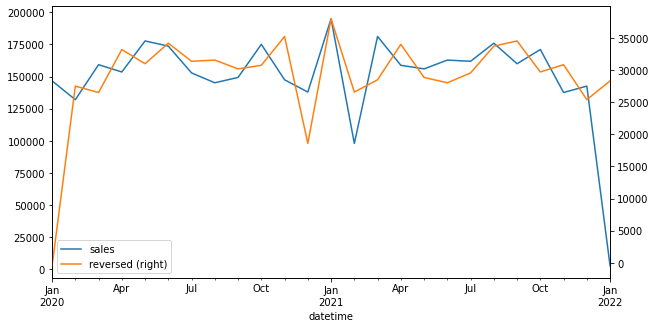

In [24]:
import random

import matplotlib.pyplot as plt
import pandas as pd

random.seed(233)

dt = pd.date_range(start="20200101", end="20220101", freq="D").set_names("datetime")
data = pd.DataFrame(
    [random.randrange(100, 10000) for _ in range(len(dt))],
    index=dt,
    columns=["sales"],
)

(
    data.resample("1M")
    .sum()
    .assign(
        reversed=lambda df: (df.loc[::-1, "sales"] * 0.2 - 1000).values
    )
    .plot.line(
        secondary_y=["reversed"],
        figsize=(10, 5),
    )
)
plt.show()

## 类别类型

In [25]:
values = list("aaabcdd")
cat = pd.Categorical(values)
cat

['a', 'a', 'a', 'b', 'c', 'd', 'd']
Categories (4, object): ['a', 'b', 'c', 'd']

In [26]:
import random
random.seed(233)


data = pd.DataFrame(
    {
        "types": cat,
        "number": [random.randrange(1000, 10000) for n in range(len(cat))],
    }
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   types   7 non-null      category
 1   number  7 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 395.0 bytes


In [27]:
data.set_index("types").groupby(level=0).sum()

,number
types,
a,18241
b,8931
c,4348
d,5040


## 兼容缺失值的基础数据类型

In [28]:
integers = pd.Series([1, 2, None, 4, 5])
integers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5 entries, 0 to 4
Series name: None
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 168.0 bytes


In [29]:
integers.head()

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

In [30]:
integers.at[2]

nan

In [31]:
type(integers.at[2])

numpy.float64

In [32]:
pd.Series([1, 3, None, 2, 5], dtype=pd.Int64Dtype())
# pd.Series([1, 3, None, 2, 5], dtype="Int64")

0       1
1       3
2    <NA>
3       2
4       5
dtype: Int64

In [33]:
pd.Series([True, True, False, None, None], dtype=pd.BooleanDtype())
# pd.Series([True, True, False, None, None], dtype="boolean")

0     True
1     True
2    False
3     <NA>
4     <NA>
dtype: boolean

In [34]:
pd.Series(["Foo", None, np.nan, "Bar", "Puf"], dtype=pd.StringDtype())
# pd.Series(["Foo", None, np.nan, "Bar", "Puf"], dtype="string")

0     Foo
1    <NA>
2    <NA>
3     Bar
4     Puf
dtype: string

In [35]:
pd.Series(["Foo", None, np.nan, "Bar", "Puf"], dtype="str").astype(pd.StringDtype())

0     Foo
1    <NA>
2    <NA>
3     Bar
4     Puf
dtype: string

In [36]:
dtypes = pd.DataFrame(
    [
        pd.Series([1, 3, None, 2, 5], name="integer"),
        pd.Series([True, True, False, None, None], name="boolean"),
        pd.Series(["Foo", None, "", "Bar", "Puf"], name="string")
    ]
).transpose()

In [37]:
dtypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   integer  4 non-null      object
 1   boolean  3 non-null      object
 2   string   4 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


In [38]:
(
    dtypes.astype(
        {
            "integer": pd.Int64Dtype(),
            "boolean": pd.BooleanDtype(),
            "string": pd.StringDtype(),
        }
    )
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   integer  4 non-null      Int64  
 1   boolean  3 non-null      boolean
 2   string   4 non-null      string 
dtypes: Int64(1), boolean(1), string(1)
memory usage: 223.0 bytes
